In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
us_landmass = np.load("output/us_landmass.npy")
us_landmass.sum()

335889

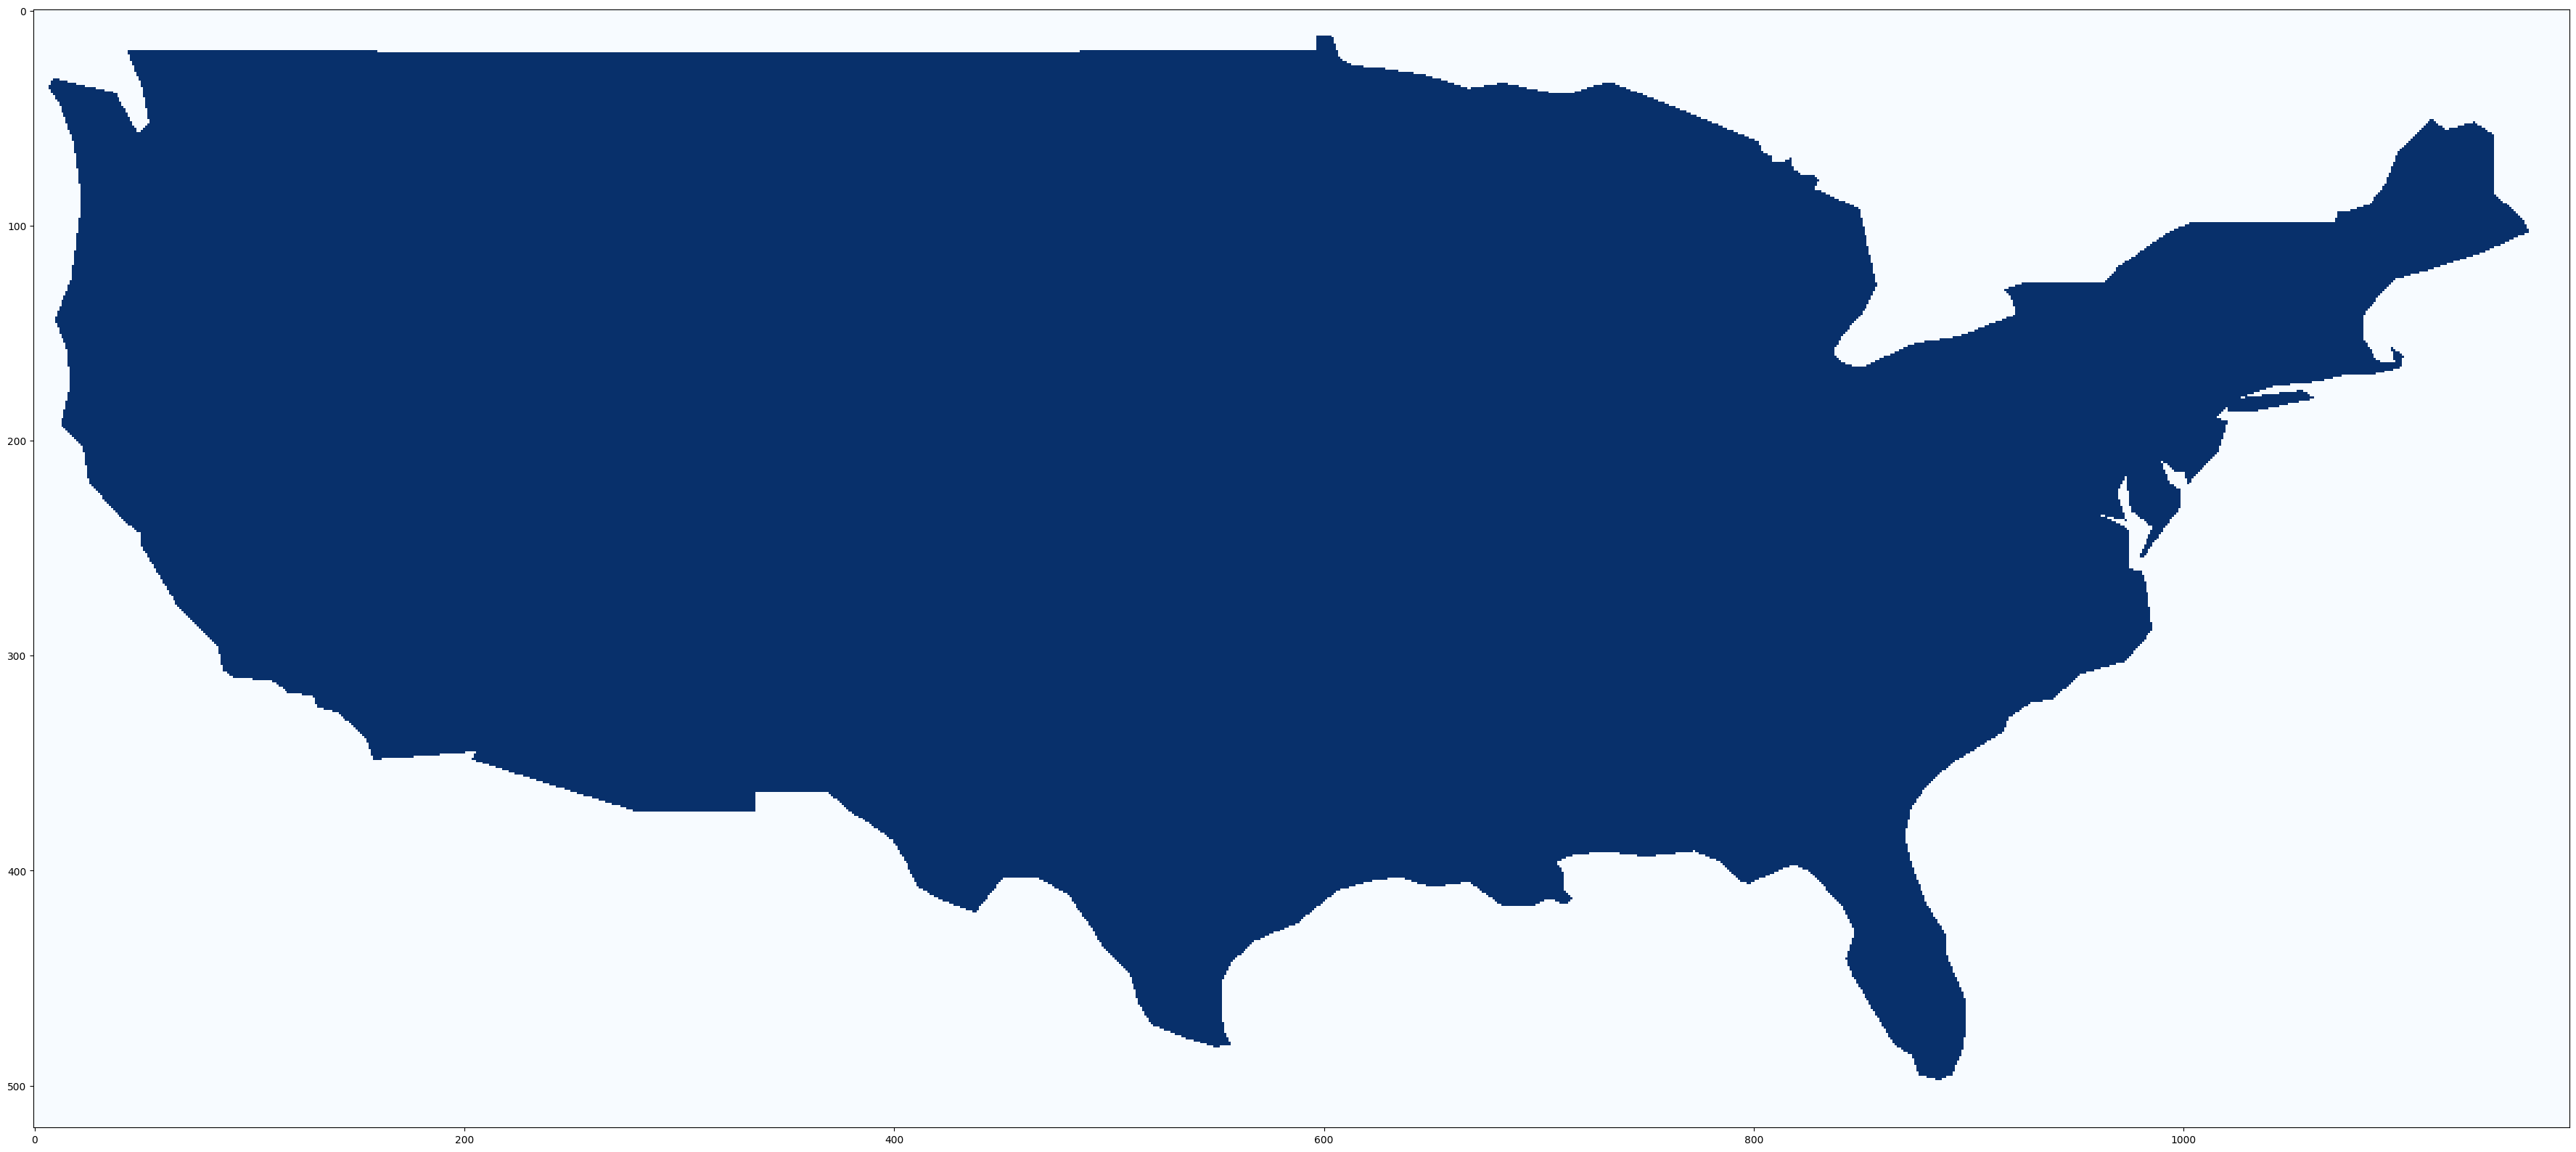

In [17]:
plt.figure(figsize = (200,20))

plt.imshow(us_landmass, cmap="Blues", interpolation='nearest')


In [4]:
import requests

In [5]:
req = requests.get("https://geo.dot.gov/mapping/rest/services/NTAD/Travel_Time_to_Work/MapServer/0/query?outFields=*&where=1%3D1&f=geojson")

In [6]:
lol = req.json()
with open("Travel_Time_To_Worl.json", "w") as js:
    js.write(lol)

TypeError: write() argument must be str, not dict

In [16]:
import json

In [20]:
lol = json.dumps(lol)

In [22]:
with open("Travel_Time_To_Worl.json", "w") as js:
    js.write(lol)

In [51]:
from geojson import Point
import folium
import pandas as pd

In [9]:
Point((-115.81, 37.24)) 

{"coordinates": [-115.81, 37.24], "type": "Point"}

In [109]:
cities= pd.read_excel("data/american_cities.xlsx")

cities = cities.sort_values("population", ascending=False)[:100]

cities

,city,lat,lng,country,population
0,New York,40.6943,-73.9249,United States,19354922
1,Los Angeles,34.1139,-118.4068,United States,12815475
2,Chicago,41.8373,-87.6861,United States,8675982
3,Miami,25.7840,-80.2102,United States,6381966
4,Dallas,32.7937,-96.7662,United States,5733259
...,...,...,...,...,...
95,Harrisburg,40.2752,-76.8843,United States,441580
96,Denton,33.2176,-97.1421,United States,440146
97,Madison,43.0808,-89.3922,United States,439553
98,Reno,39.5497,-119.8483,United States,433271


In [124]:
pd.read_excel("data/american_cities.xlsx")

m = folium.Map(location=[38.5, -95.6], min_zoom = 5, max_zoom=9, zoom_start= 5, control_scale=True, zoom_control=False)
for i in cities.index:
    name = cities.loc[i]["city"]
    lat_lon = [cities.loc[i]["lat"], cities.loc[i]["lng"]]
    pop = cities.loc[i]["population"]
    folium.Marker(
        lat_lon,
        popup=f'{name}: {pop:,}',
        icon=folium.Icon(icon='building', prefix="fa", color="black"),
    ).add_to(m)

m.save("maps_html/100_cities_map.html")

In [155]:
term = pd.read_csv("data/terminal_clean.csv")

m = folium.Map(location=[38.5, -95.6], min_zoom = 5, max_zoom=9, zoom_start= 5, control_scale=True, zoom_control=False)
for i in term.index:
    lat_lon = [term.loc[i]["Latitude"], term.loc[i]["Longitude"]]
    cap = term.loc[i]["CapacityInMtpa"]
    color = "red" if cap < 0 else "green"
    folium.Marker(
        lat_lon,
        popup=f'{cap}',
        icon=folium.Icon(icon='bolt', prefix="fa", color=color),
    ).add_to(m)

m.save("maps_html/term_map.html")

In [159]:
station = pd.read_csv("data/terminal_clean.csv")

station = station[station.StartYear1 <= 2022]

m = folium.Map(location=[38.5, -95.6], min_zoom = 5, max_zoom=9, zoom_start= 5, control_scale=True, zoom_control=False)
for i in station.index:
    lat_lon = [term.loc[i]["Latitude"], term.loc[i]["Longitude"]]
    cap = term.loc[i]["CapacityInMtpa"]
    color = "red" if cap < 0 else "green"
    folium.Marker(
        lat_lon,
        popup=f'{cap}',
        icon=folium.Icon(icon='bolt', prefix="fa", color=color),
    ).add_to(m)

m.save("maps_html/term_map.html")

,StartYear1,StartYear2,StartYear3,CapacityInMtpa,Latitude,Longitude
0,2022.0,NaN,NaN,-2.00,29.105833,-90.194444
1,2023.0,NaN,NaN,-3.00,29.105833,-90.194444
2,2016.0,NaN,NaN,-0.06,25.809175,-80.296697
3,NaN,NaN,NaN,-0.63,28.591111,-80.820000
4,2022.0,NaN,NaN,-0.67,29.772927,-93.334304
...,...,...,...,...,...,...
134,2025.0,NaN,NaN,-11.30,29.597258,-89.872471
135,2023.0,NaN,NaN,-6.10,29.067000,-89.656000
136,2023.0,NaN,NaN,-2.80,29.059022,-89.822603
137,2023.0,NaN,NaN,-0.15,42.106794,-72.015988


In [186]:
from sklearn.utils import shuffle

In [197]:
station = pd.read_csv("data/Alternative_Fueling_Stations.csv", low_memory=False)

station = shuffle(station, random_state=21).reset_index(drop=True)[:100]

definitions = {
    "BD":"Bio diesel",
    "CNG":"Compressed natural gas",
    "E85":"Ethanol-gasoline",
    "ELEC":"Electric",
    "HY":"Hydrogen",
    "LNG":"Liquified natural gas",
    "LPG":"Liquified petroleum gas",
    "":""
}

m = folium.Map(location=[38.5, -95.6], min_zoom = 5, max_zoom=9, zoom_start= 5, control_scale=True, zoom_control=False)
for i in station.index:
    lat_lon = [station.loc[i]["latitude"], station.loc[i]["longitude"]]
    type = station.loc[i]["fuel_type_code"]
    city = station.loc[i]["city"]
    folium.Marker(
        lat_lon,
        popup=f'{city}: {type}',
        icon=folium.Icon(icon='car', prefix="fa", color="black"),
    ).add_to(m)

m.save("maps_html/alt_fuel_sta.html")

In [198]:
station = pd.read_csv("data/Alternative_Fueling_Stations.csv", low_memory=False)
elec = station[station["fuel_type_code"]=="ELEC"]

In [204]:
station = pd.read_csv("data/Alternative_Fueling_Stations.csv", low_memory=False)
elec = station[station["fuel_type_code"]=="ELEC"]

elec = shuffle(elec, random_state=22).reset_index(drop=True)[:100]

m = folium.Map(location=[38.5, -95.6], min_zoom = 5, max_zoom=9, zoom_start= 5, control_scale=True, zoom_control=False)
for i in elec.index:
    lat_lon = [elec.loc[i]["latitude"], elec.loc[i]["longitude"]]
    city = elec.loc[i]["city"]
    net = elec.loc[i]["ev_network"]
    folium.Marker(
        lat_lon,
        popup=f'{city}: {net}',
        icon=folium.Icon(icon='car', prefix="fa", color="black"),
    ).add_to(m)

m.save("maps_html/elec_fuel_sta.html")

In [241]:
definitions = {
    "CNG":  {
                "code":"Compressed natural gas", "label":"cng_fill_type_code", "rule": 
                {
                    "B":"Fast-fill and time-fill", 
                    "Q":"Fast-fill", 
                    "T":"Time-fill"
                }
            },
    "E85":  {
                "code":"Ethanol-gasoline", "label":"e85_blender_pump", "rule": 
                {
                    1:"as a blender pump capable of providing mid-level ethanol blends", 
                    0:"does not have a blender pump"
                }
            },
    "ELEC": {"code":"Electric", "label":"ev_network", "rule": {}},
    "LPG":  {
            "code":"Liquified petroleum gas", "label":"lpg_primary", "rule": 
                {
                    1: "suited for large vehicules",
                    0: "not suited for large vehicules"
                }
            }
}


In [242]:
station = pd.read_csv("data/Alternative_Fueling_Stations.csv", low_memory=False)

for key in definitions.keys():
    print(key)
    df = station[station["fuel_type_code"]==key]

    df = shuffle(df, random_state=22).reset_index(drop=True)[:100]

    m = folium.Map(location=[38.5, -95.6], min_zoom = 5, max_zoom=9, zoom_start= 5, control_scale=True, zoom_control=False)
    for i in df.index:
        lat_lon = [df.loc[i]["latitude"], df.loc[i]["longitude"]]
        city = df.loc[i]["city"]
        look = definitions[key]["label"]
        try:
            label = definitions[key]["rule"][df.loc[i][look]]
        except:
            label = ""
        folium.Marker(
            lat_lon,
            popup=f'{city}: {label}',
            icon=folium.Icon(icon='car', prefix="fa", color="black"),
        ).add_to(m)

m.save(f"maps_html/{key.lower()}_fuel_sta.html")

CNG
E85
ELEC
LPG


In [237]:
station.groupby("e85_blender_pump").count()

,X,Y,OBJECTID,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,...,bd_blends_fr,groups_with_access_code_fr,ev_pricing_fr,federal_agency_id,federal_agency_code,federal_agency_name,ev_network_ids_station,ev_network_ids_posts,longitude,latitude
e85_blender_pump,,,,,,,,,,,,,,,,,,,,,
0.0,2957,2957,2957,2957,2828,741,2731,2942,32,2957,...,0,2957,0,125,125,125,0,0,2957,2957
1.0,1477,1477,1477,1477,1471,340,1359,1477,8,1477,...,0,1477,0,0,0,0,0,0,1477,1477


In [238]:
"E85".lower()

'e85'

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.read_excel("data/american_cities.xlsx").to_csv("american_cities.csv")

In [90]:
maps = os.listdir("ml/data/map")
maps.remove("us_map.npy")
maps_dict = {map.replace(".npy",""): np.load(f"ml/data/map/{map}") for map in maps}
xmap = np.load("ml/data/map/us_map.npy")[::-1]

In [91]:
def get_zone(longitude, latitude, map, size = 10):
    x, y = np.unravel_index(np.argmin(np.sqrt((xmap[:, :, 0] - latitude) ** 2 + (xmap[:, :, 1] - longitude) ** 2)), xmap.shape[:2])
    print(x, y)
    zone = maps_dict[map][max([x-size, 0]):min([x+size, xmap.shape[0]]), max([y-size,0]):min([y+size,xmap.shape[1]])]
    if (x-size < 0):
        top = -(x-size)
        zone = np.append(np.zeros((top, zone.shape[1])), zone, axis=0)
    elif (x+size > xmap.shape[0]):
        bottom = x + size - xmap.shape[0]
        zone = np.append(zone, np.zeros((bottom, zone.shape[1])), axis=0)
    
    if (y-size < 0):
        left = -(y-size)
        zone = np.append(np.zeros((zone.shape[0],left)), zone, axis = 1)
    elif (y+size > xmap.shape[1]):
        right = y + size - xmap.shape[1]
        zone = np.append(zone, np.zeros((zone.shape[0],right)), axis = 1)
    return zone

24 6
24 6


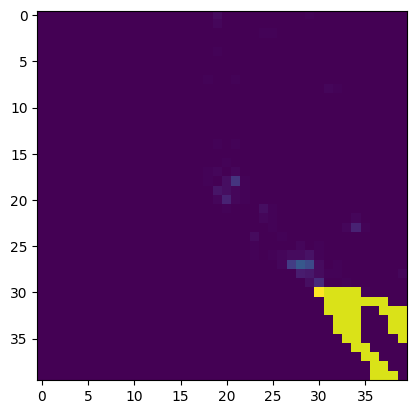

In [116]:
LON = -121.890591
LAT = 37.3361663
MAP = "e85_stations"
SIZE = 20
plt.imshow(get_zone(LON, LAT, MAP, SIZE)+ get_zone(LON, LAT, "mex_landmass", SIZE)*100)

In [104]:
maps_dict.keys()

dict_keys(['elec_stations', 'us_landmass', 'docks', 'airports', 'e85_stations', 'lng_terminals', 'truck_stops', 'ferry_terminals', 'transit_stops', 'lpg_stations', 'rlrd_nodes', 'mex_landmass', 'cng_stations', 'can_landmass'])